In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split

# Datos

In [2]:
# Cargamos los datos
X, y = fetch_california_housing(return_X_y=True)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Curva de aprendizaje para Depth 5

In [17]:
# Instanciamos un árbol
depth = 5
tree = DecisionTreeRegressor(max_depth=depth,random_state=42)

In [18]:
# Definimos la estrategia de validación
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [19]:
# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    tree, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 100), n_jobs=-1, verbose=1
)

[learning_curve] Training set sizes: [ 1486  1621  1756  1891  2026  2161  2296  2431  2566  2701  2836  2972
  3107  3242  3377  3512  3647  3782  3917  4052  4187  4322  4458  4593
  4728  4863  4998  5133  5268  5403  5538  5673  5808  5944  6079  6214
  6349  6484  6619  6754  6889  7024  7159  7294  7430  7565  7700  7835
  7970  8105  8240  8375  8510  8645  8780  8916  9051  9186  9321  9456
  9591  9726  9861  9996 10131 10266 10402 10537 10672 10807 10942 11077
 11212 11347 11482 11617 11752 11887 12023 12158 12293 12428 12563 12698
 12833 12968 13103 13238 13373 13509 13644 13779 13914 14049 14184 14319
 14454 14589 14724 14860]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   21.1s finished


In [20]:
# Calculamos los errores medios y sus desvíos
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = -np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

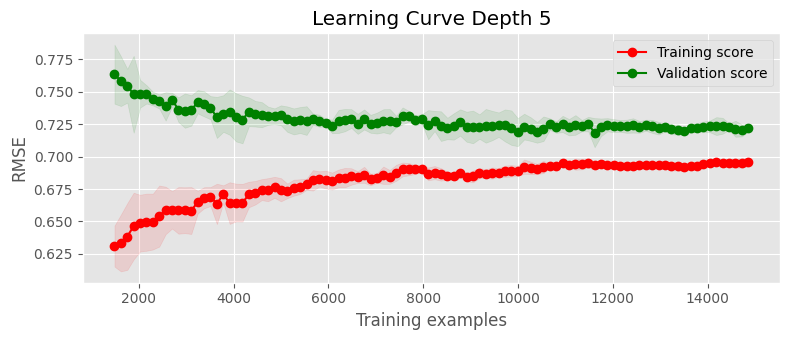

In [21]:
# Graficamos
plt.figure(figsize=(8, 3.5))
plt.title(f'Learning Curve Depth {depth}')
plt.xlabel("Training examples")
plt.ylabel("RMSE")

plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")

plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Curva de aprendizaje para Depth 10

In [32]:
# Instanciamos un árbol
depth = 10
tree = DecisionTreeRegressor(max_depth=depth,random_state=42)

In [33]:
# Definimos la estrategia de validación
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [34]:
# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    tree, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 100), n_jobs=-1, verbose=1
)

[learning_curve] Training set sizes: [ 1486  1621  1756  1891  2026  2161  2296  2431  2566  2701  2836  2972
  3107  3242  3377  3512  3647  3782  3917  4052  4187  4322  4458  4593
  4728  4863  4998  5133  5268  5403  5538  5673  5808  5944  6079  6214
  6349  6484  6619  6754  6889  7024  7159  7294  7430  7565  7700  7835
  7970  8105  8240  8375  8510  8645  8780  8916  9051  9186  9321  9456
  9591  9726  9861  9996 10131 10266 10402 10537 10672 10807 10942 11077
 11212 11347 11482 11617 11752 11887 12023 12158 12293 12428 12563 12698
 12833 12968 13103 13238 13373 13509 13644 13779 13914 14049 14184 14319
 14454 14589 14724 14860]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   31.6s finished


In [35]:
# Calculamos los errores medios y sus desvíos
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = -np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

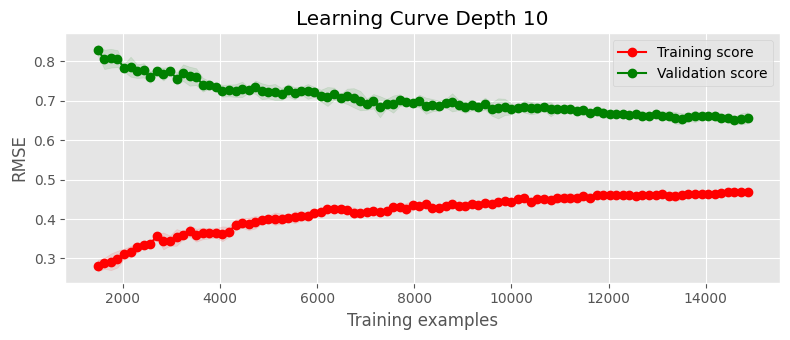

In [36]:
# Graficamos
plt.figure(figsize=(8, 3.5))
plt.title(f'Learning Curve Depth {depth}')
plt.xlabel("Training examples")
plt.ylabel("RMSE")

plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")

plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Curva de aprendizaje para Depth None

In [37]:
# Instanciamos un árbol
depth = None
tree = DecisionTreeRegressor(max_depth=depth,random_state=42)

In [38]:
# Definimos la estrategia de validación
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [39]:
# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    tree, X_train, y_train, cv=cv, scoring='neg_root_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 100), n_jobs=-1, verbose=1
)

[learning_curve] Training set sizes: [ 1486  1621  1756  1891  2026  2161  2296  2431  2566  2701  2836  2972
  3107  3242  3377  3512  3647  3782  3917  4052  4187  4322  4458  4593
  4728  4863  4998  5133  5268  5403  5538  5673  5808  5944  6079  6214
  6349  6484  6619  6754  6889  7024  7159  7294  7430  7565  7700  7835
  7970  8105  8240  8375  8510  8645  8780  8916  9051  9186  9321  9456
  9591  9726  9861  9996 10131 10266 10402 10537 10672 10807 10942 11077
 11212 11347 11482 11617 11752 11887 12023 12158 12293 12428 12563 12698
 12833 12968 13103 13238 13373 13509 13644 13779 13914 14049 14184 14319
 14454 14589 14724 14860]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   53.3s finished


In [40]:
# Calculamos los errores medios y sus desvíos
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std  = np.std(train_scores, axis=1)
test_scores_mean  = -np.mean(test_scores, axis=1)
test_scores_std   = np.std(test_scores, axis=1)

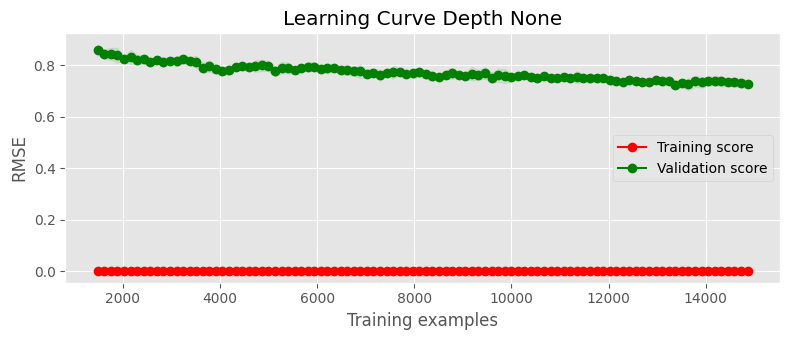

In [41]:
# Graficamos
plt.figure(figsize=(8, 3.5))
plt.title(f'Learning Curve Depth {depth}')
plt.xlabel("Training examples")
plt.ylabel("RMSE")

plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.1, color="r")
plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Validation score")

plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Validamos el mejor modelo

In [42]:
# Instanciamos un árbol
depth = 10
tree = DecisionTreeRegressor(max_depth=depth,random_state=42)

In [43]:
# Entrenamos con todos los datos de entrenamiento
tree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [44]:
from sklearn.metrics import root_mean_squared_error

In [47]:
# Calculamos las predicciones
y_pred_train = tree.predict(X_train)
y_pred_test  = tree.predict(X_test)

In [49]:
# Calculamos los costos
rmse_train = root_mean_squared_error(y_train, y_pred_train)
rmse_test  = root_mean_squared_error(y_test, y_pred_test)

print(f'RMSE Train: {rmse_train:.2f}')
print(f'RMSE Test:  {rmse_test:.2f}')

RMSE Train: 0.48
RMSE Test:  0.65
